### Introduction to Naive Bayes

In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.

### Naive Bayes algorithm intuition

Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the Maximum A Posteriori (MAP).

The MAP for a hypothesis with 2 events A and B is

MAP (A)

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.

Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.

In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.

### Types of Naive Bayes algorithm

There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

Gaussian Naïve Bayes

Multinomial Naïve Bayes

Bernoulli Naïve Bayes

### Gaussian Naive Bayes algorithm

When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let µi be the mean of the values and let σi be the variance of the values associated with the ith class.

### Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Import data set

In [2]:
data= pd.read_csv('C:/Users/User/Desktop/NEVTTC/MACHINE LEARNING/Supervised Learning/golf-dataset.csv')

In [3]:
data.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Outlook    14 non-null     object
 1   Temp       14 non-null     object
 2   Humidity   14 non-null     object
 3   Windy      14 non-null     bool  
 4   Play Golf  14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [5]:
data.dtypes

Outlook      object
Temp         object
Humidity     object
Windy          bool
Play Golf    object
dtype: object

### Exploratoty data Analysis

In [6]:
data.shape

(14, 5)

In [7]:
# view frequency counts of values in categorical variables

### data Preprocesing

In [8]:
data.isnull().sum()

Outlook      0
Temp         0
Humidity     0
Windy        0
Play Golf    0
dtype: int64

<AxesSubplot:>

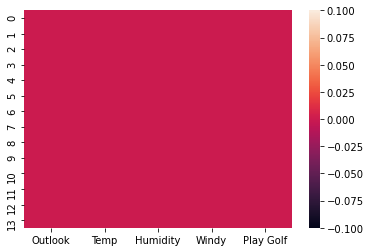

In [9]:
sns.heatmap(data.isnull())

### Split data set

In [10]:
x= data.iloc[:,:-1]
y=data.iloc[:, -1:]

In [11]:
x.head()

,Outlook,Temp,Humidity,Windy
0,Rainy,Hot,High,False
1,Rainy,Hot,High,True
2,Overcast,Hot,High,False
3,Sunny,Mild,High,False
4,Sunny,Cool,Normal,False


In [12]:
y.head()

,Play Golf
0,No
1,No
2,Yes
3,Yes
4,Yes


In [13]:
print('Shape of x data ', x.shape)
print ('Shape of y data', y.shape)

Shape of x data  (14, 4)
Shape of y data (14, 1)


### Feature scaling

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
data.Outlook.unique()

array(['Rainy', 'Overcast', 'Sunny'], dtype=object)

In [16]:
data.Temp.unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [17]:
data.Humidity.unique()


array(['High', 'Normal'], dtype=object)

In [18]:
data.Windy.unique()

array([False,  True])

In [19]:
oe = OrdinalEncoder(categories=[['Rainy', 'Overcast', 'Sunny'],['Hot', 'Mild', 'Cool'],['High', 'Normal'],[False,  True]])

In [20]:
x= pd.DataFrame(oe.fit_transform(x))


In [21]:
x

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,2.0,1.0,0.0,0.0
4,2.0,2.0,1.0,0.0
5,2.0,2.0,1.0,1.0
6,1.0,2.0,1.0,1.0
7,0.0,1.0,0.0,0.0
8,0.0,2.0,1.0,0.0
9,2.0,1.0,1.0,0.0


In [22]:
y=y.replace('Yes',0)
y=y.replace('No',1)

In [23]:
y

,Play Golf
0,1
1,1
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


### train data set / model selection

In [24]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y ,test_size=0.2 , random_state=0)

In [25]:
print('shape of x_train =' , x_train.shape)
print('shape of x_test =' , x_test.shape)
print('shape of y_train =' , y_train.shape)
print('shape of y_test =' , y_test.shape)

shape of x_train = (11, 4)
shape of x_test = (3, 4)
shape of y_train = (11, 1)
shape of y_test = (3, 1)


In [26]:
x_train

,0,1,2,3
11,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0
13,2.0,1.0,0.0,1.0
9,2.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0
10,0.0,1.0,1.0,1.0
3,2.0,1.0,0.0,0.0
0,0.0,0.0,0.0,0.0
5,2.0,2.0,1.0,1.0


In [27]:
y_train

,Play Golf
11,0
2,0
13,1
9,0
1,1
7,1
10,0
3,0
0,1
5,1


### naive base model

In [28]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(x_train,y_train)
model

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [29]:
model.predict(x_test)

array([1, 1, 0], dtype=int64)

In [30]:
diff=pd.DataFrame({'Actual value':y_test.squeeze() , "predecited value" : model.predict(x_test).squeeze() })
diff

,Actual value,predecited value
8,0,1
6,0,1
4,0,0


In [31]:
from sklearn import metrics
metrics.accuracy_score(y_test, model.predict(x_test))

0.3333333333333333

## decision tree

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

At the beginning, the whole training set is considered as the root.
Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
Records are distributed recursively on the basis of attribute values.
Order to placing attributes as root or internal node of the tree is done by using some statistical approach.
I will describe Decision Tree terminology in later section.

### Decision Tree algorithm terminology

In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.

We can see that there is some terminology involved in Decision Tree algorithm. The terms involved in Decision Tree algorithm are as follows:-

### Root Node

It represents the entire population or sample. This further gets divided into two or more homogeneous sets.

### Splitting

In [ ]:

It is a process of dividing a node into two or more sub-nodes.

### Decision Node

In [ ]:
When a sub-node splits into further sub-nodes, then it is called a decision node.

### Leaf/Terminal Node

Nodes that do not split are called Leaf or Terminal nodes.

### Pruning

When we remove sub-nodes of a decision node, this process is called pruning. It is the opposite process of splitting.

### Branch/Sub-Tree

A sub-section of an entire tree is called a branch or sub-tree.

### Parent and Child Node


A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node.

### Attribute selection measures

The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the attributes selection. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-

Information gain

Gini index

While using Information gain as a criterion, we assume attributes to be categorical and for Gini index attributes are assumed to be continuous. These attribute selection measures are described below.

### Gini index 


Another attribute selection measure that CART (Categorical and Regression Trees) uses is the Gini index. It uses the Gini method to create split points.

Gini index can be represented with the following diagram:-

In [32]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier().fit(x_train,y_train)

In [33]:
model1.predict(x_test)

array([0, 0, 0], dtype=int64)

In [34]:
diff=pd.DataFrame({'Actual value':y_test.squeeze() , "predecited value" : model1.predict(x_test).squeeze() })
diff

,Actual value,predecited value
8,0,0
6,0,0
4,0,0


In [35]:
from sklearn import metrics
metrics.accuracy_score(y_test, model1.predict(x_test))

1.0

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40) )
model= DecisionTreeClassifier().fit(x,y)
plot_tree(model , filled=True)
plt.title('Decision Tree Graph')
plt.show()


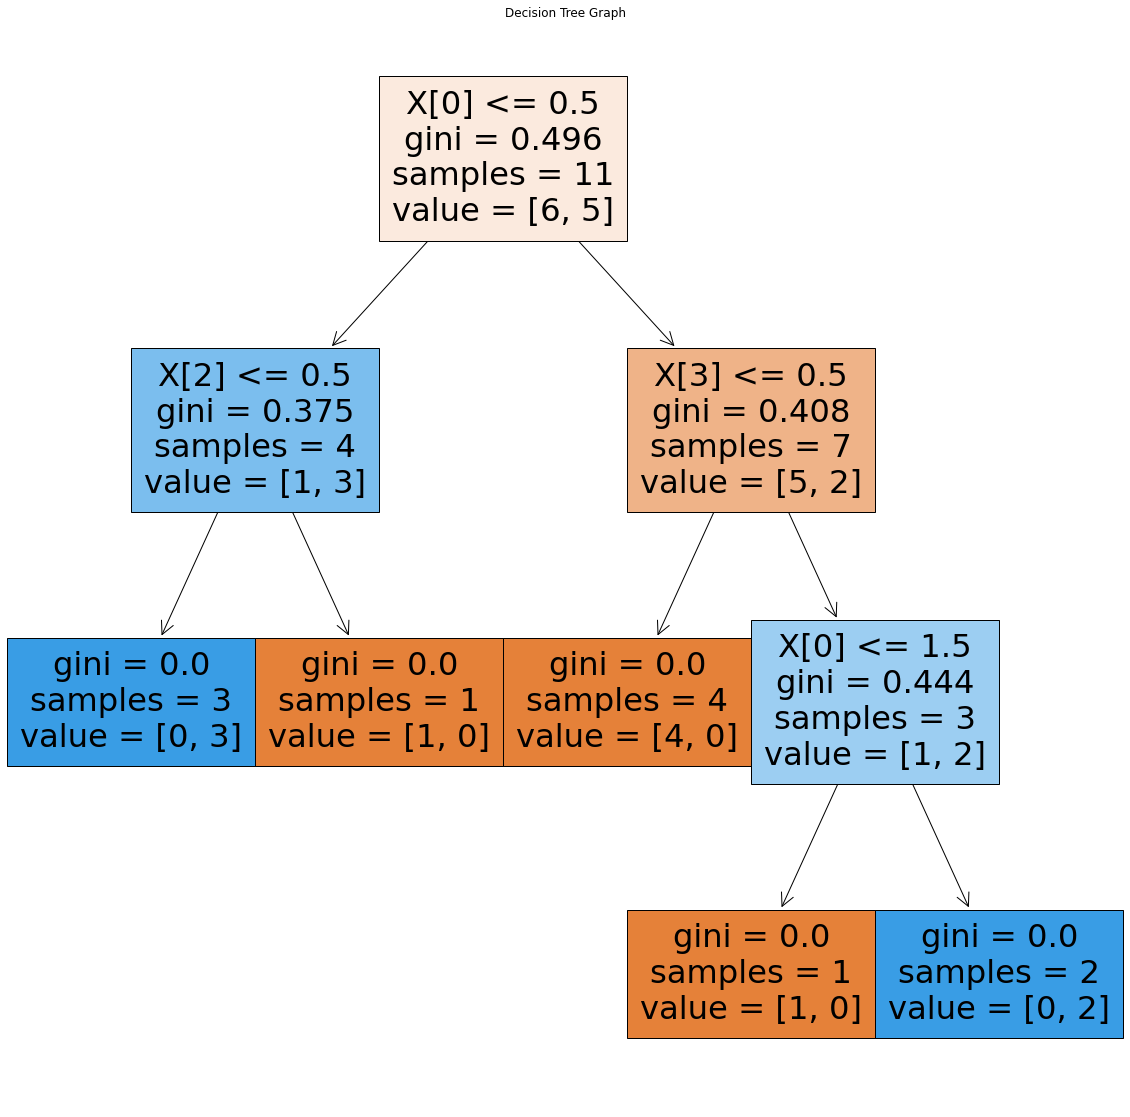

In [42]:
#  for test
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(model1, filled= True )
plt.title('Decision Tree Graph')
plt.show()

### for x and  y

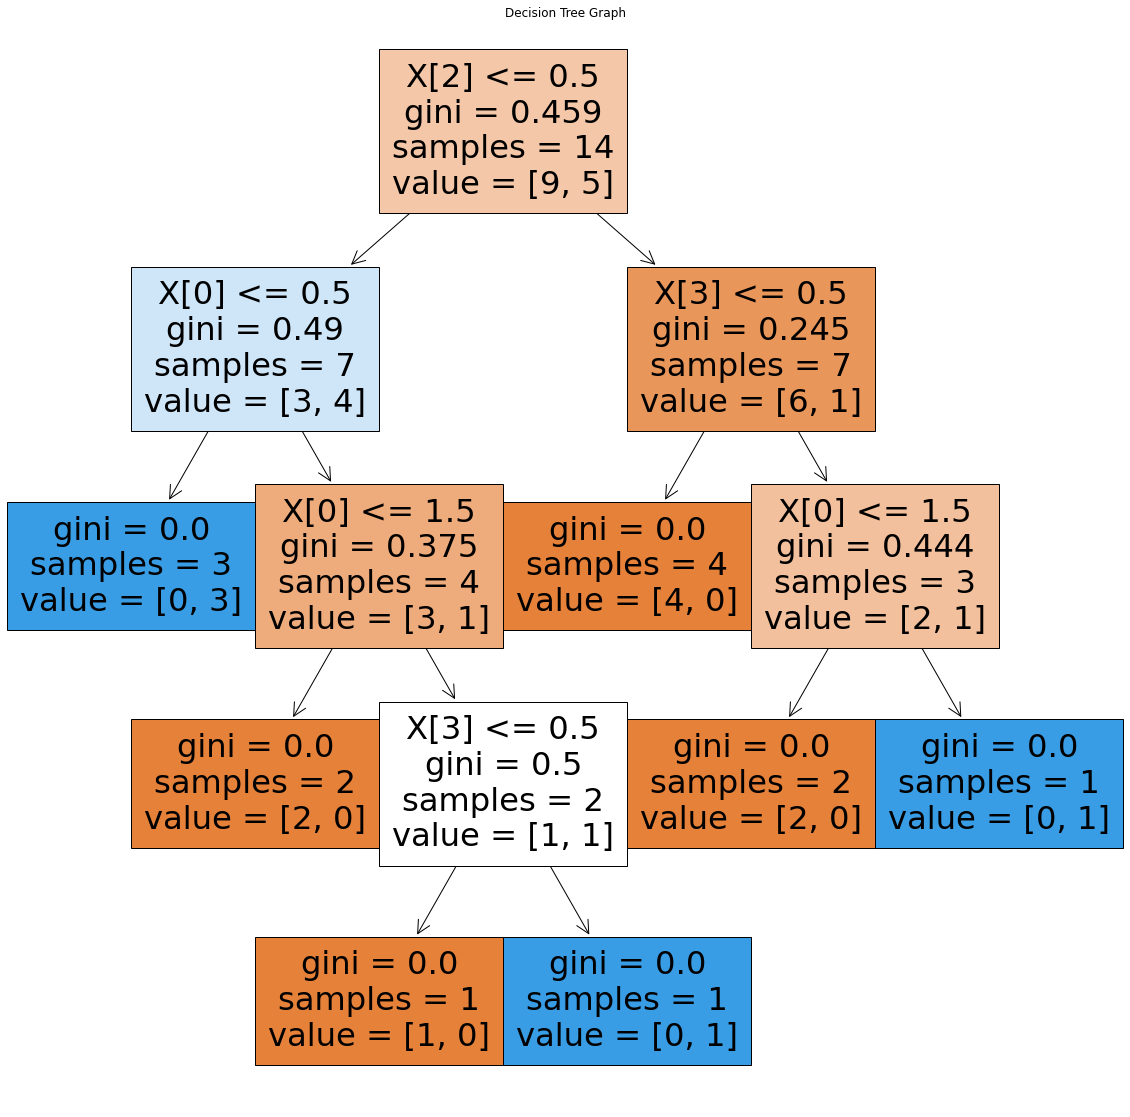

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
model2= DecisionTreeClassifier().fit(x,y)
plot_tree(model2, filled= True )
plt.title('Decision Tree Graph')
plt.show()

